# Task 1: House Price Prediction

C:\Users\jjerl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error: 3772545706.43
R² Score: nan


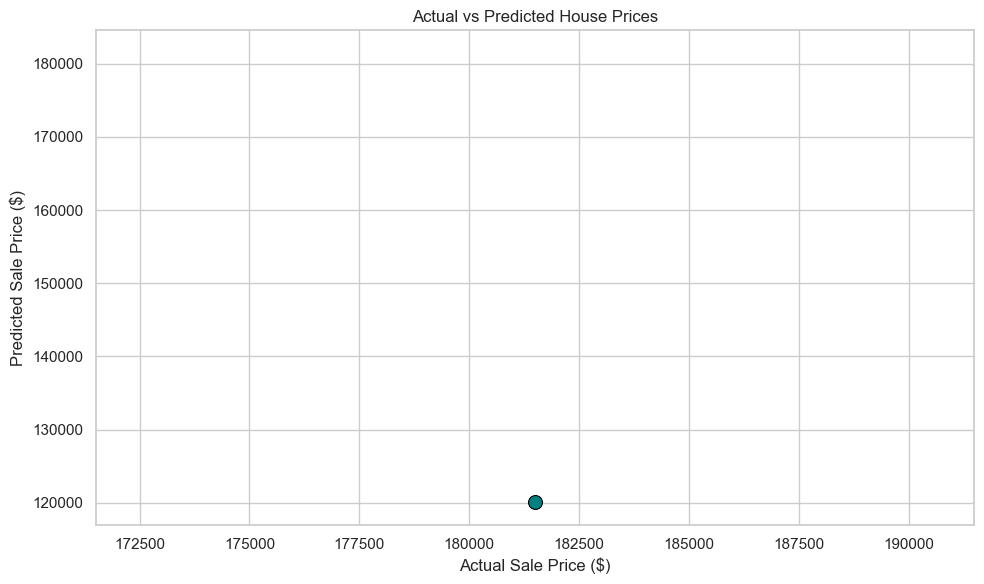

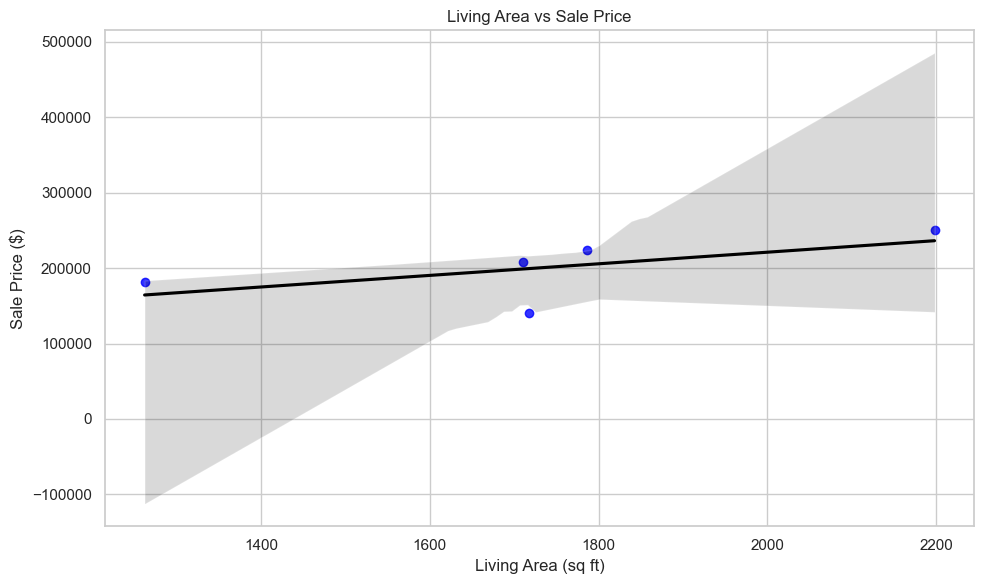

C:\Users\jjerl\AppData\Local\Temp\ipykernel_19988\340202278.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df, palette='Set2')


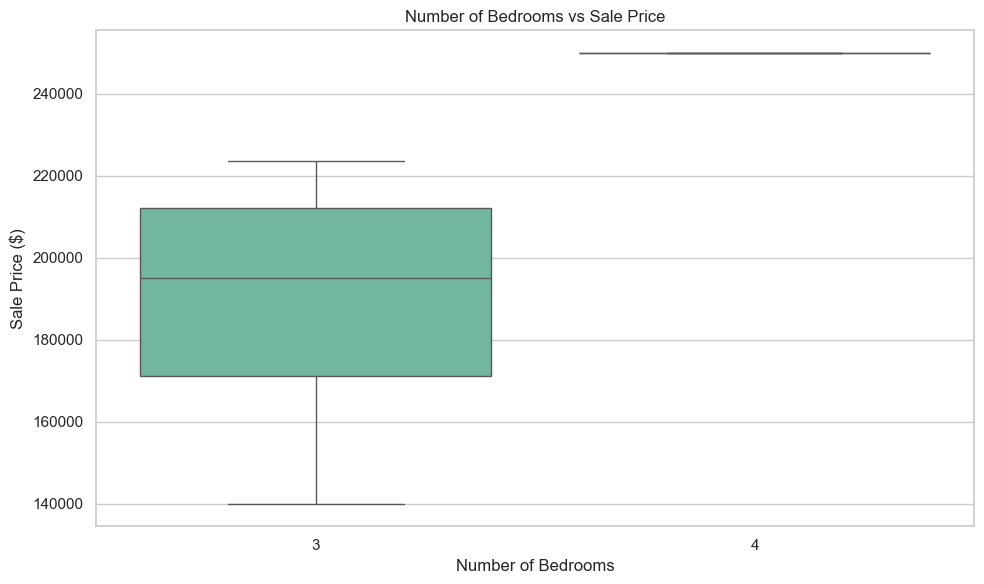

C:\Users\jjerl\AppData\Local\Temp\ipykernel_19988\340202278.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FullBath', y='SalePrice', data=df, palette='Pastel1')


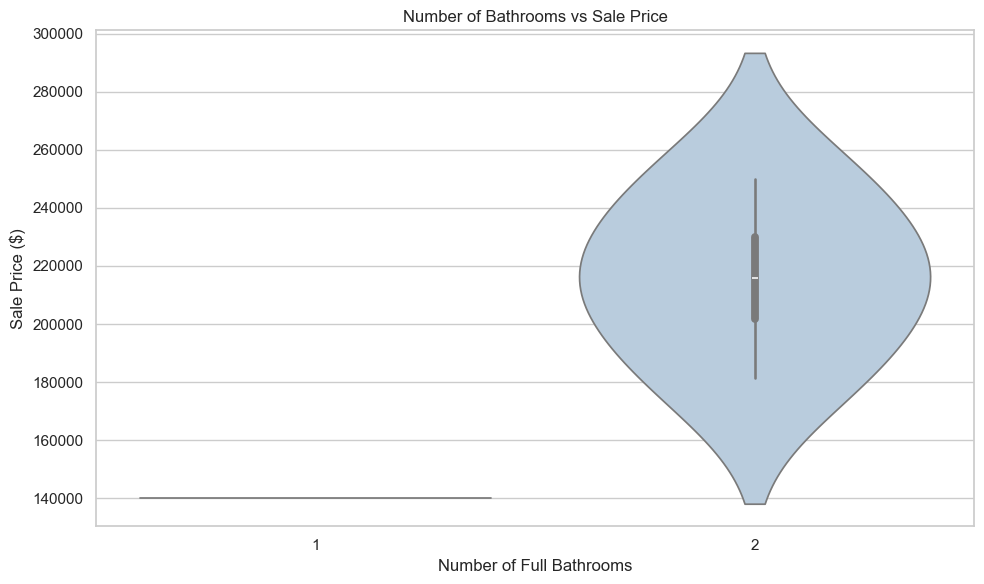

In [1]:
# A linear regression model to predict house prices based on living area, bedrooms, and bathrooms.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Sample dataset
data = {
    'GrLivArea': [1710, 1262, 1786, 1717, 2198],
    'BedroomAbvGr': [3, 3, 3, 3, 4],
    'FullBath': [2, 2, 2, 1, 2],
    'SalePrice': [208500, 181500, 223500, 140000, 250000]
}

df = pd.DataFrame(data)

# Define features and target
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Combined DataFrame for plotting
results = X_test.copy()
results['Actual Price'] = y_test.values
results['Predicted Price'] = y_pred

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results, s=100, color='teal', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.tight_layout()
plt.show()

# Visualization: GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'black'})
plt.title('Living Area vs Sale Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.show()

# Visualization: BedroomAbvGr vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df, palette='Set2')
plt.title('Number of Bedrooms vs Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.show()

# Visualization: FullBath vs SalePrice
plt.figure(figsize=(10, 6))
sns.violinplot(x='FullBath', y='SalePrice', data=df, palette='Pastel1')
plt.title('Number of Bathrooms vs Sale Price')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.show()
